In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.style.use("dark_background")
plt.rcParams['axes.labelsize'] = '14'

def preprocess_data(data):
    data["p_go_decision"] = data.decision == "go"
    data = data.join(pd.DataFrame(data["a_condition"].str.strip("[]").str.split(",").to_list(), columns=["a_0", "a_1"]))
    data = data.astype({"a_0": float, "a_1": float})

    # exclude training trials
    data = data[30:-1]
    data = data[(data.RT>0) & (data.RT<2.5)]
    data = data[data.tau_condition<100]
    print("Number of collisions: ", len(data[data.collision]))
    data = data[~data.collision]
    return data

def plot_RT_hist(data):
    sns.distplot(data[data.decision=="go"].RT)
    sns.distplot(data[data.decision=="stay"].RT)

In [15]:
data = pd.read_csv("../data/pilot0/participant_2_20210601_1012.csv", sep="\t")
# data = pd.read_csv("../data/pilot0/participant_7_20210601_1835.csv", sep="\t")
data = preprocess_data(data)

Number of collisions:  14


## Response time histogram

c:\users\nwmbeckers\repositories\cognitive-av\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\nwmbeckers\repositories\cognitive-av\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


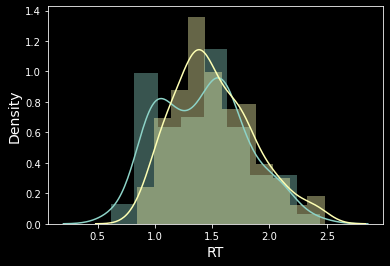

In [16]:
plot_RT_hist(data)

In [13]:
data[data.p_go_decision].RT.mean()-data[~data.p_go_decision].RT.mean()

-0.4028321728009093

## Probability of "go" decision

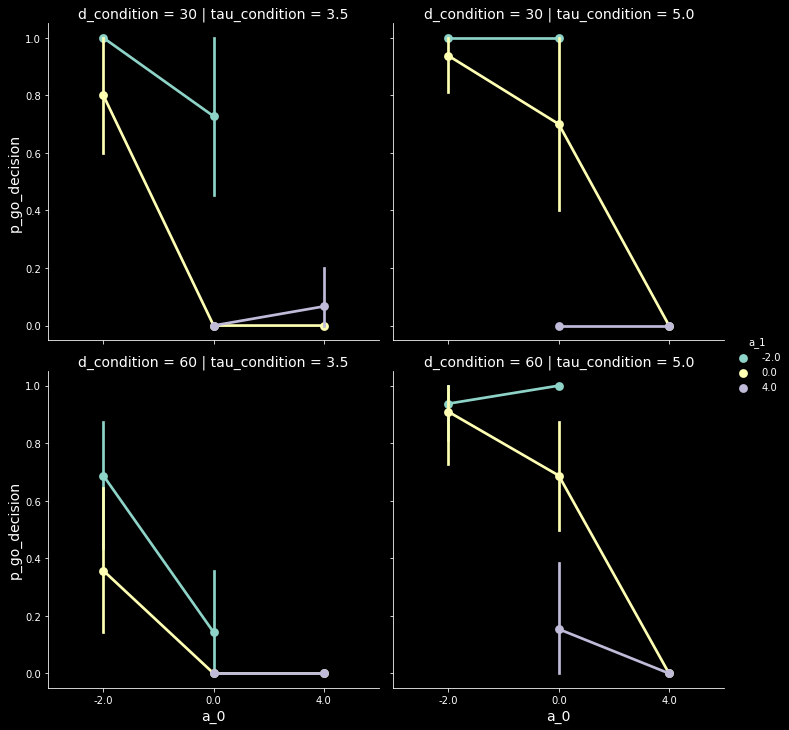

In [17]:
sns.catplot(data=data, x="a_0", y="p_go_decision", row="d_condition", col="tau_condition",
            hue="a_1", kind="point")

## Response times: "go". Not enough response times though in some conditions so seaborn is confused:(

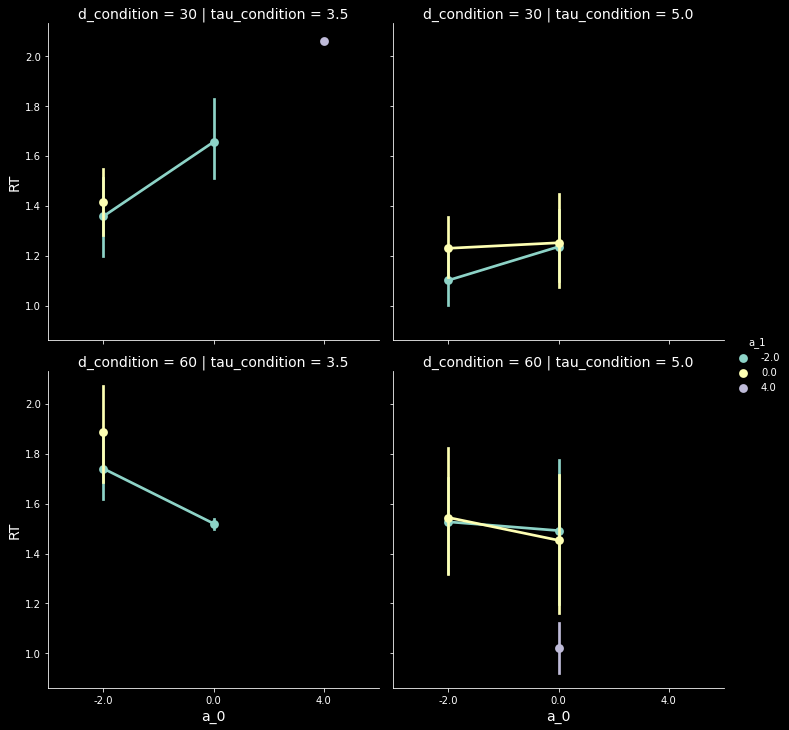

In [18]:
sns.catplot(data=data[data.decision=="go"], x="a_0", y="RT", row="d_condition", col="tau_condition",
            hue="a_1", kind="point", estimator=np.nanmean)

## Response times: "stay"

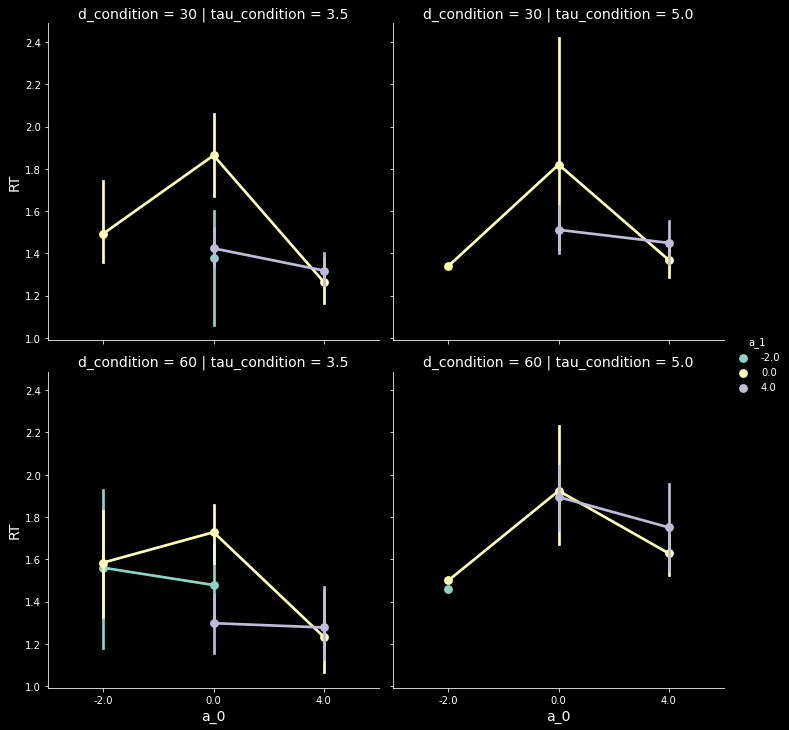

In [9]:
sns.catplot(data=data[data.decision=="stay"], x="a_0", y="RT", row="d_condition", col="tau_condition",
            hue="a_1", kind="point", estimator=np.nanmean)


sns.catplot(data=data[data.decision=="stay"], x="a_0", y="RT", row="d_condition", col="tau_condition",
            hue="a_1", kind="point", estimator=np.nanmean)


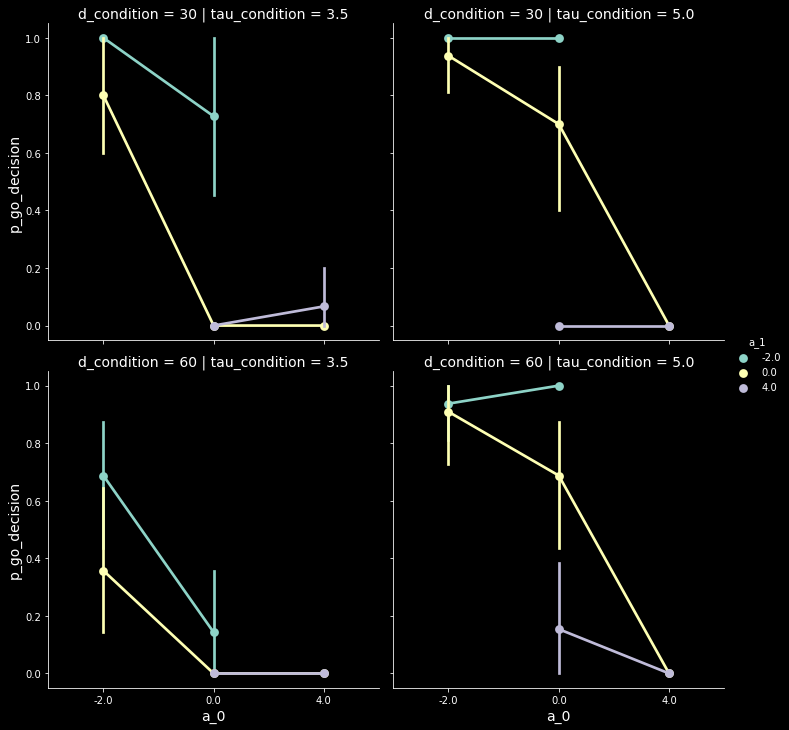

In [10]:
sns.catplot(data=data, x="a_0", y="p_go_decision", row="d_condition", col="tau_condition",
            hue="a_1", kind="point")

## Response times: "go". Not enough response times though in some conditions so seaborn is confused:(

ValueError: 'c' argument has 3 elements, which is not acceptable for use with 'x' with size 0, 'y' with size 0.

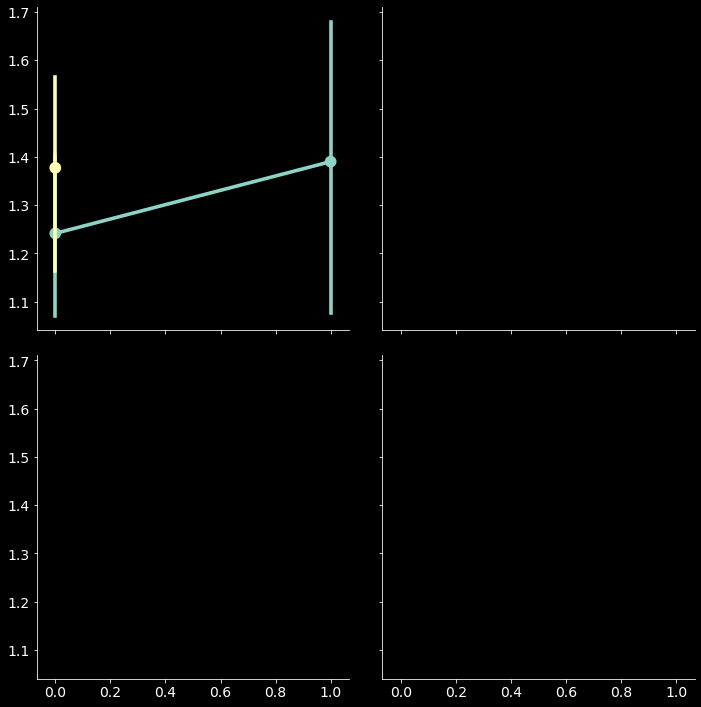

In [24]:
sns.catplot(data=data[data.decision=="go"], x="a_0", y="RT", row="d_condition", col="tau_condition",
            hue="a_1", kind="point", estimator=np.nanmean)

## Response times: "stay"

ValueError: 'c' argument has 3 elements, which is not acceptable for use with 'x' with size 0, 'y' with size 0.

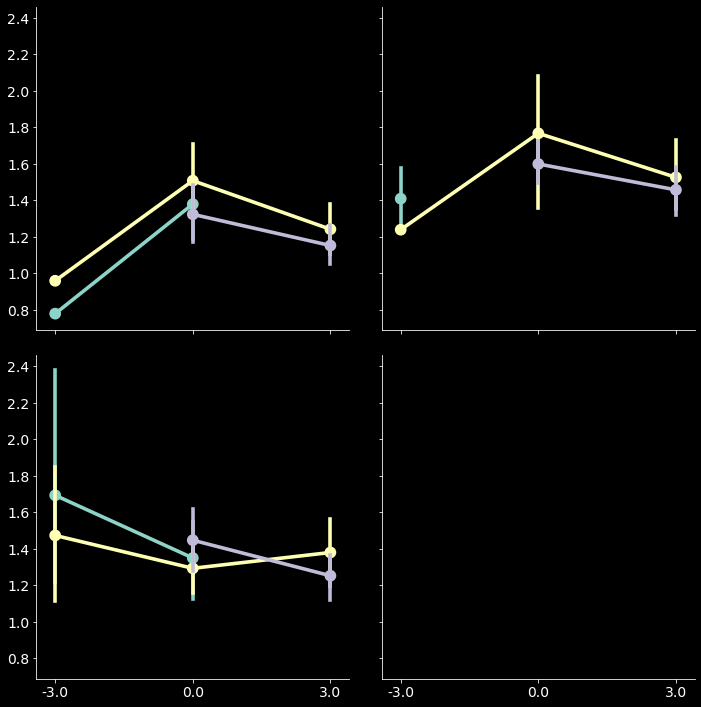

In [25]:
sns.catplot(data=data[data.decision=="stay"], x="a_0", y="RT", row="d_condition", col="tau_condition",
            hue="a_1", kind="point", estimator=np.nanmean)
